In [1]:
import random
import math

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import tree
import joblib

import scipy

In [4]:
plt.rcParams["figure.figsize"] = (15, 17)

## load random forest model

In [5]:
fold = 10
filename_min = './min_random_forest_model_%d.sav' % (fold)
filename_max = './max_random_forest_model_%d.sav' % (fold)

In [6]:
rfr_min = joblib.load(filename_min)
rfr_max = joblib.load(filename_max)

## create test data from test dataset

In [7]:
pth_min = '../processed_data/test_min.csv'
df_min = pd.read_csv(pth_min)

In [8]:
pth_max = '../processed_data/test_max.csv'
df_max = pd.read_csv(pth_max)

In [9]:
df_min.shape

(57, 14)

In [10]:
df_max.shape

(9, 14)

In [11]:
df_combine = pd.concat([df_min, df_max])

In [12]:
df_combine

,Unnamed: 0,height,weight,gender,bmi,age,rh,heart_rate,stress_level,skin_temp,eda,Clo,Act,env_temp
0,166,1.77,68.0,-1.0,21.705129,24.0,57.779,76.298872,23.987342,31.672874,0.877379,0.54,1.0,25.841111
1,25,1.83,74.0,-1.0,22.096808,24.0,46.650,84.000000,23.987342,31.693000,0.009496,0.50,1.1,26.390000
2,229,1.63,50.0,1.0,18.818924,23.0,41.050,86.000000,23.987342,30.563000,0.281910,0.50,1.0,24.641111
3,217,1.63,50.0,1.0,18.818924,23.0,39.170,67.000000,7.000000,31.672874,0.059989,0.50,1.0,23.868889
4,10,1.63,50.0,1.0,18.818924,23.0,54.550,79.000000,27.000000,31.672874,0.017312,0.50,1.0,24.737778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,43,1.77,58.0,-1.0,18.513199,23.0,51.234,102.500000,78.000000,33.636000,0.585949,0.36,1.3,26.817778
5,26,1.60,52.5,1.0,20.507812,24.0,51.538,88.158537,62.485294,32.559814,-0.100261,0.53,1.0,22.608889
6,6,1.77,58.0,-1.0,18.513199,23.0,55.272,87.000000,62.485294,32.915000,0.006857,0.36,1.0,26.377778
7,8,1.77,90.0,-1.0,28.727377,28.0,60.389,67.000000,62.485294,31.013000,0.188456,0.36,1.1,26.377778


In [13]:
X_columns = ['height', 'weight', 'gender', 'bmi', 'age', 'rh', \
              'heart_rate', 'stress_level', 'skin_temp', 'eda', \
              'Clo', 'Act']

In [14]:
X = df_combine[X_columns]
y = df_combine['env_temp']

## exmine with other model

### examine max prediction

In [15]:
# y_pred_pmv = np.array(df_max['pmv_temp_max'])

In [16]:
# y_pred_pmv

In [17]:
X = df_max[X_columns]
y_true = np.array(df_max['env_temp'])

In [18]:
y_true

array([26.37777778, 27.17277778, 25.91388889, 27.235     , 26.81777778,
       22.60888889, 26.37777778, 26.37777778, 24.84722222])

In [19]:
y_pred_rf = rfr_max.predict(X)

In [20]:
y_pred_rf

array([26.50987897, 27.06311657, 26.22809077, 27.11436954, 26.8311131 ,
       24.91902381, 26.35058681, 26.97459276, 26.28780556])

#### max - mse

In [21]:
# mean squared error
mse_rf = mean_squared_error(y_true, y_pred_rf)
# mse_pmv = mean_squared_error(y_true, y_pred_pmv)
display(mse_rf)
# display(mse_pmv)

0.8790955365643064

In [22]:
# drop ratio
# (mse_pmv - mse_rf) / mse_pmv

#### max - r2

In [23]:
# R2 score
r2_rf = r2_score(y_true, y_pred_rf)
# r2_pmv = r2_score(y_true, y_pred_pmv)
display(r2_rf)
# display(r2_pmv)

0.5297646981363215

### examine min prediction

In [24]:
# y_pred_pmv = np.array(df_min['pmv_temp_min'])

In [25]:
# y_pred_pmv

In [26]:
X = df_min[X_columns]
y_true = np.array(df_min['env_temp'])

In [27]:
y_true

array([25.84111111, 26.39      , 24.64111111, 23.86888889, 24.73777778,
       23.67722222, 24.545     , 23.00388889, 24.65277778, 25.28277778,
       25.01611111, 25.31888889, 23.77277778, 24.545     , 23.96611111,
       24.75      , 23.71277778, 23.67722222, 24.545     , 24.06222222,
       21.86722222, 25.02777778, 23.86888889, 23.48388889, 25.67111111,
       24.06222222, 23.86888889, 25.30722222, 22.63277778, 25.31888889,
       23.67722222, 25.59777778, 24.58111111, 23.48388889, 24.835     ,
       23.80888889, 25.21      , 24.15777778, 23.19611111, 24.17111111,
       23.545     , 23.77277778, 24.545     , 25.16222222, 21.915     ,
       24.255     , 24.255     , 25.01611111, 24.12222222, 26.09722222,
       24.545     , 25.31888889, 23.905     , 23.665     , 24.15777778,
       23.29222222, 25.42777778])

In [28]:
y_pred_rf = rfr_max.predict(X)

In [29]:
y_pred_rf

array([26.99285764, 28.24967907, 25.7692629 , 25.95623165, 25.14688988,
       27.54073115, 25.28378671, 25.9176746 , 26.68895784, 26.20649256,
       26.58774157, 26.00869544, 27.23472173, 25.77650496, 27.36237897,
       26.58066171, 26.9429752 , 26.15909425, 27.32281399, 27.45898661,
       25.52466518, 27.25844395, 25.89204018, 26.03027381, 26.48997222,
       25.91708234, 27.4620119 , 26.47147123, 25.99730853, 25.1853006 ,
       27.3624127 , 25.3646622 , 26.6783006 , 25.75238492, 25.62940923,
       25.71869643, 26.64890873, 25.75697024, 26.04920139, 26.69131399,
       26.05006349, 26.05044048, 27.1315129 , 25.58225   , 25.78458333,
       25.98442659, 27.57749653, 26.60359226, 26.69166468, 27.17638194,
       27.55314335, 25.38143651, 26.86357639, 26.93907143, 25.67230208,
       25.68319643, 26.40880556])

#### min - mse

In [30]:
# mean squared error
mse_rf = mean_squared_error(y_true, y_pred_rf)
# mse_pmv = mean_squared_error(y_true, y_pred_pmv)
display(mse_rf)
# display(mse_pmv)

5.387122510275596

In [31]:
# drop ratio
# (mse_pmv - mse_rf) / mse_pmv

#### min - r2

In [32]:
# R2 score
r2_rf = r2_score(y_true, y_pred_rf)
# r2_pmv = r2_score(y_true, y_pred_pmv)
display(r2_rf)
# display(r2_pmv)

-5.367950282868098

## predict

### predict comfort zone min value

In [16]:
y_pred_min = rfr_min.predict(X)

### transfer to Celsius

In [18]:
y_pred_min

array([-3.63584637, -3.67958995, -4.21965969, -4.30939663, -4.30476455,
       -4.57274162, -4.18196753, -3.90356791, -4.06595615, -4.01696994,
       -4.42696737, -4.23681036, -3.97922619, -4.07271674, -4.46889638,
       -4.45001367, -4.18509656, -4.4386552 , -4.76419709, -3.82451764,
       -4.49472059, -4.62727381, -3.78204453, -4.43685022, -4.42676631,
       -3.96177422, -5.03597266, -4.21156173, -3.6972209 , -4.13191468,
       -4.41008583, -3.8883989 , -4.53466931, -3.98163141, -4.42011082,
       -4.41272553, -4.08942923, -4.93214065, -4.37207275, -4.26628175,
       -4.26264043, -5.20906393, -4.13618787, -4.39395944, -4.25736606,
       -4.05599944, -3.68661332, -4.58431349, -3.92215153, -4.07794218,
       -4.60341534, -4.37763228, -4.37123214, -4.00701502, -3.45181261,
       -3.41476146, -3.65462919, -4.49238272, -3.70027734, -4.27046076,
       -3.97090898, -4.41498677, -3.68133245])

### predict comfort zone max value

In [19]:
y_pred_max = rfr_max.predict(X)

### transfer to Celsius

In [21]:
y_pred_max

array([-2.85082099, -2.02787654, -3.63801543, -3.51340741, -2.37649383,
       -3.52704938, -3.04809877, -3.32012037, -3.01692284, -3.5262716 ,
       -2.63703704, -3.61433642, -2.40118827, -3.02450309, -2.86890123,
       -3.43761111, -2.41861111, -2.36070679, -3.62453704, -2.51600309,
       -3.48270988, -3.44759877, -3.09124691, -3.60469136, -2.36070679,
       -3.14597531, -3.41631481, -2.40620062, -3.80550617, -2.80175309,
       -3.59952469, -3.63729321, -3.67622531, -3.04553086, -3.62548457,
       -3.44250309, -2.76705556, -3.38959259, -3.43485185, -2.70841667,
       -3.6930216 , -3.53533951, -3.59831481, -2.35508333, -2.9934321 ,
       -2.80760802, -2.80923457, -2.38248765, -3.80065432, -3.00414198,
       -2.85742593, -3.43936111, -3.62509877, -3.1920216 , -3.06324383,
       -2.71874691, -3.26585494, -2.75460494, -2.89760185, -3.96538272,
       -3.17866975, -2.72652778, -3.23030864])

### detect error

In [22]:
errorIdx = []
for i in range(len(y_pred_min)):
    if y_pred_max[i] <= y_pred_min[i]:
        errorIdx.append(i)

In [23]:
errorIdx

[28]

In [24]:
df_combine.iloc[errorIdx,:]

,Unnamed: 0,height,weight,gender,bmi,age,rh,heart_rate,stress_level,skin_temp,eda,Clo,Act,env_temp,pmv_temp_min,pmv_temp_max
28,203,1.64,54.0,1.0,20.077335,24.0,61.437,73.0,7.0,32.137,0.250057,0.74,1.0,78.076,21.7,NaN


### delete the unacceptable values

In [25]:
t_min = []
t_max = []
for i in range(len(y_pred_min)):
    if y_pred_min[i] <= y_pred_max[i]:
        t_min.append(y_pred_min[i])
        t_max.append(y_pred_max[i])
    else:
        t_min.append(y_pred_min[i])
        t_max.append(y_pred_min[i])

In [26]:
len(t_min)

63

### plot zone

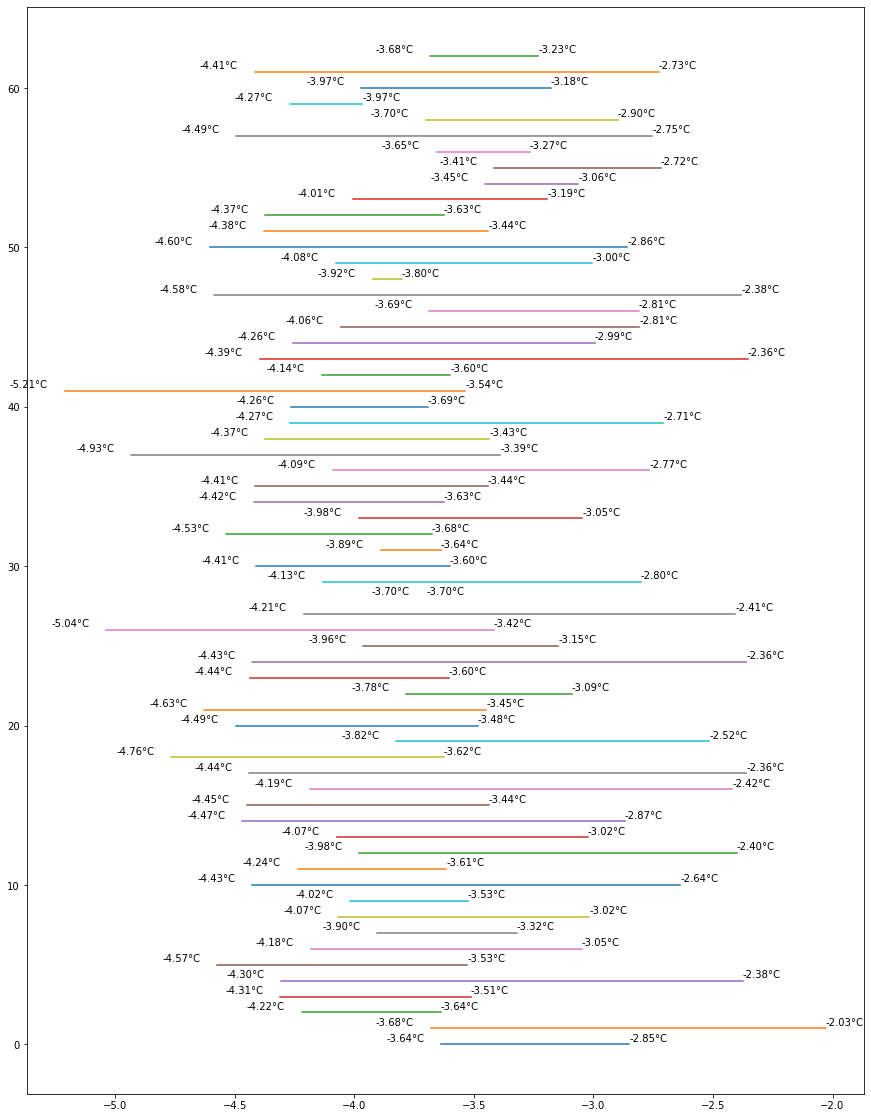

In [27]:
plt.rcParams["figure.figsize"] = (15, 20)
# draw comfort zone
for i in range(len(t_min)):
    plt.plot([t_min[i], t_max[i]],[i, i])
    
# tag comfort zone min $ max
for i in range(len(t_min)):
    plt.text(t_min[i]- 0.23, i+0.2, "%.2f°C" % t_min[i])
    plt.text(t_max[i], i+0.2, "%.2f°C" % t_max[i])

plt.show()

## predict group tempreture model

In [28]:
import math

class OptimalGroupTempreture():
    def __init__(self, minTs, maxTs, sensitivity=1.0, defaultMinMaxRange=1.0):
        """
        sensitivity > 0, less means more sensitive
        defaultMinMaxRange > 0 or == None
        """
        if len(minTs) != len(maxTs):
            print('Length of min tempreture records and max tempretur records are not equal!')
            return None
        self.minTs = minTs
        self.maxTs = maxTs
        self.sensitivity = sensitivity
        self.defaultMinMaxRange = defaultMinMaxRange
        self.otdDF = None
        self.optimalTargetTemperatureOTD = None
        self.max_otd = None
        self.min_otd = None
    
    def getTempreture(self, model='auto', sensitivePeoplePercentageLimit=0.1, sensitiveRange=2, ppd=0.1):
        """
        model = 'auto', 'sensitive first', 'otd model'
        sensitivePeoplePercentage is > 0 and < 1
        sensitiveRange is > 0, unit is Fahrenheit Degree
        ppd: only for OTD model
        """
        minTs = self.minTs
        maxTs = self.maxTs

        if self.defaultMinMaxRange is not None:
            avgTs = [(maxTs[i] + minTs[i]) / 2 for i in range(len(minTs))]
            tRanges = [maxTs[i] - minTs[i] for i in range(len(minTs))]
            checkedtRanges = []
            for i in range(len(tRanges)):
                t = tRanges[i] if tRanges[i] > 0 else self.defaultMinMaxRange
                checkedtRanges.append(t)
        else:
            avgTs = []
            tRanges = [maxTs[i] - minTs[i] for i in range(len(minTs))]
            checkedtRanges = []
            for i in range(len(tRanges)):
                if tRanges[i] > 0:
                    t = tRanges[i]
                    checkedtRanges.append(t)
                    avgTs.append((maxTs[i] + minTs[i]) / 2)

        # model selection
        if model == 'sensitive first':
            print('sensitive first model')
            targetTempreture = self.sensitiveFirst(checkedtRanges, avgTs)
        elif model == 'otd model':
            print('otd model')
            targetTempreture = self.otdModel(checkedtRanges, avgTs, ppd)
        elif model == 'auto':
            lengthOfSensitivePeople = len([tRange for tRange in checkedtRanges if tRange <= sensitiveRange])
            if lengthOfSensitivePeople / len(checkedtRanges) >= sensitivePeoplePercentageLimit:
                print('sensitive first model')
                print('sensitive people percentage:', lengthOfSensitivePeople / len(checkedtRanges))
                targetTempreture = self.sensitiveFirst(checkedtRanges, avgTs)
            else:
                print('otd model')
                targetTempreture = self.otdModel(checkedtRanges, avgTs, ppd)
                if targetTempreture is None:
                    print('otd model does not find a acceptable value, use sensitive first model')
                    targetTempreture = self.sensitiveFirst(checkedtRanges, avgTs)
        else:
            print('Wrong model')
            return None

        return targetTempreture

    def sensitiveFirst(self, checkedtRanges, averageTs):
        weights = [self.computeWeight(tRange) for tRange in checkedtRanges]
        weightedTs = [averageTs[i] * weights[i] for i in range(len(averageTs))]
        targetTempreture = sum(weightedTs) / sum(weights)
        return targetTempreture

    def computeWeight(self, tRange):
        return (1 / tRange) ** self.sensitivity

    def otdModel(self, checkedtRanges, averageTs, ppd):
        forFig = []
        numberOfPeople = len(checkedtRanges)
        permitNumberOfUncomfortablePeople = math.floor(numberOfPeople * ppd)
        otdMax = (numberOfPeople - permitNumberOfUncomfortablePeople) * 1 + \
            permitNumberOfUncomfortablePeople * (numberOfPeople + 1)

        rangeTs = [self.otdDecideComfortness(checkedtRanges[i], averageTs[i]) for i in range(len(checkedtRanges))]

        # find minT and maxT
        minT = min([averageTs[i] - checkedtRanges[i] / 2 for i in range(len(checkedtRanges))])
        maxT = max([averageTs[i] + checkedtRanges[i] / 2 for i in range(len(checkedtRanges))])

        acceptableTs = []
        max_otd = float('-inf')
        min_otd = float('inf')
        for t10 in range(int(minT * 10), int(maxT * 10) + 1):
            t = t10 / 10
            otd = self.computeOTD(t, numberOfPeople, rangeTs)
            
            forFig.append([t, otd, 1])
            max_otd = max(max_otd, otd)
            min_otd = min(min_otd, otd)
            if otd <= otdMax:
                acceptableTs.append([t, otd])
        
        self.max_otd = max_otd
        self.min_otd = min_otd
        
        if acceptableTs == []:
            return None
        acceptableTs.sort(key=lambda x: x[1])
        maxValues = [acceptableTs[0][0]]
        for i in range(1, len(acceptableTs)):
            if acceptableTs[i][1] == acceptableTs[0][1]:
                maxValues.append(acceptableTs[i][0])
#         print(acceptableTs)
        opt_temp = sum(maxValues) / len(maxValues)
        forFig.append([opt_temp, self.computeOTD(opt_temp, numberOfPeople, rangeTs), 20])
        self.otdDF = pd.DataFrame(forFig, columns=['temperature(°C)', 'otd', 'isFinal'])
        
        self.optimalTargetTemperatureOTD = opt_temp
        return opt_temp
    
    def computeOTD(self, t, numberOfPeople, rangeTs):
        otd = 0
        for x in rangeTs:
            if t >= x[0][0] and t <= x[0][1]:
                otd += 0
            elif t >= x[1][0] and t <= x[1][1]:
                otd += 1
            elif t >= x[2][0] and t <= x[2][1]:
                otd += numberOfPeople + 1
            else:
                otd = (numberOfPeople + 1) * 2
        return otd

                
    def otdDecideComfortness(self, checkedtRange, averageT, \
                            littleUncomfortable=[1 , 1.4], \
                            uncomfortable=[1.4, 1.7]):
        radius = checkedtRange / 2
        rangeComfortable = [averageT - radius * littleUncomfortable[0], averageT + radius * littleUncomfortable[0]]
        rangeLittleUncomfortable = [averageT - radius * littleUncomfortable[1], averageT + radius * littleUncomfortable[1]]
        rangeUncomfortable = [averageT - radius * uncomfortable[1], averageT + radius * uncomfortable[1]]
        return [rangeComfortable, rangeLittleUncomfortable, rangeUncomfortable]
    
    def drawOtdValue(self):
        ct = sns.color_palette()
        ct = [ct[2], ct[3]]
        sns.set_theme(style="darkgrid")
        sns.relplot(x="temperature(°C)", y="otd", data=self.otdDF, hue="isFinal", palette=ct, \
                    size="isFinal", height=7, aspect=16/9)

In [29]:
ogt = OptimalGroupTempreture(y_pred_min, y_pred_max, defaultMinMaxRange=None)

In [30]:
# use sensitive first model to predict the group comfortable tempreture
ogt.getTempreture(sensitiveRange=4)

sensitive first model
sensitive people percentage: 1.0


-3.703761990433895

In [31]:
# use otd model to predict the group comfortable tempreture
ogt.getTempreture(model='otd model', ppd=0.1)

otd model


-3.6206896551724137

In [32]:
ogt.otdDF

,temperature(°C),otd,isFinal
0,-5.20000,126,1
1,-5.10000,126,1
2,-5.00000,126,1
3,-4.90000,126,1
4,-4.80000,126,1
5,-4.70000,126,1
6,-4.60000,126,1
7,-4.50000,126,1
8,-4.40000,126,1
9,-4.30000,126,1


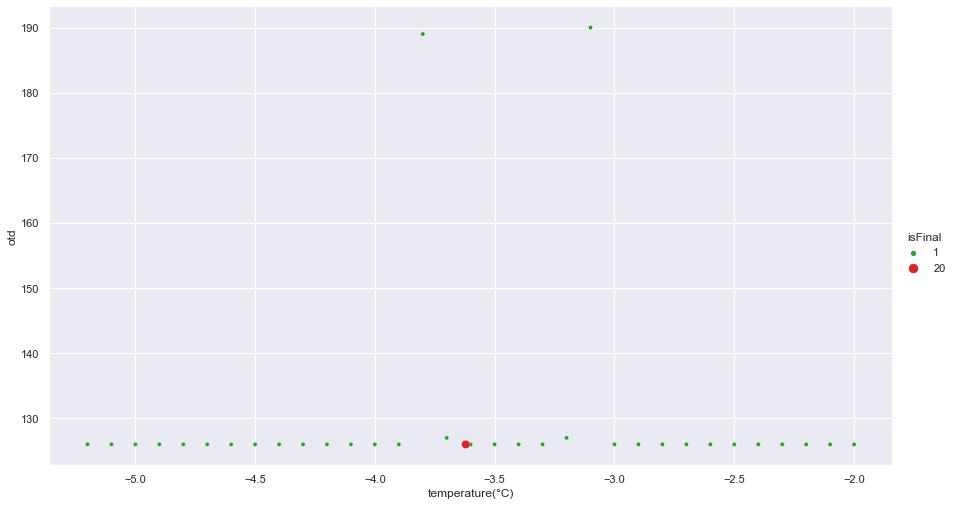

In [33]:
ogt.drawOtdValue()